In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [2]:

# Load dataset
dataset1 = pd.read_csv("DS_jOBs.csv", index_col=None)

# Create copy of dataset
df2 = dataset1.copy()

# One-hot encode categorical variables
df2 = pd.get_dummies(df2, drop_first=True)

In [3]:
# Split data into independent (X) and dependent (Y) variables
indep_X = df2.drop(columns=['salary'])
dep_Y = df2['salary']


In [4]:
# Step 1: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.3, random_state=42)

In [5]:
# Step 2: Training a Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

Model MSE before permutation: 14141591604.1120

Feature Importance:
                                            Feature  Importance Mean  \
1                                    salary_in_usd     1.888803e+08   
28                           employee_residence_US     1.540317e+08   
12  job_title_Machine Learning Engineer  in office     1.108661e+08   
36                             work_setting_Remote     1.051335e+08   
43                                  company_size_M     9.390245e+07   
0                                        work_year     7.525796e+07   
7                       job_title_Data Scientist       7.144377e+07   
13                        job_title_Statistician       6.959166e+07   
24                           employee_residence_IN     6.215325e+07   
17                        job_category_Engineering     5.780471e+07   
23                           employee_residence_DE     5.176681e+07   
9              job_title_Data Scientist  in office     3.952261e+07   
32      

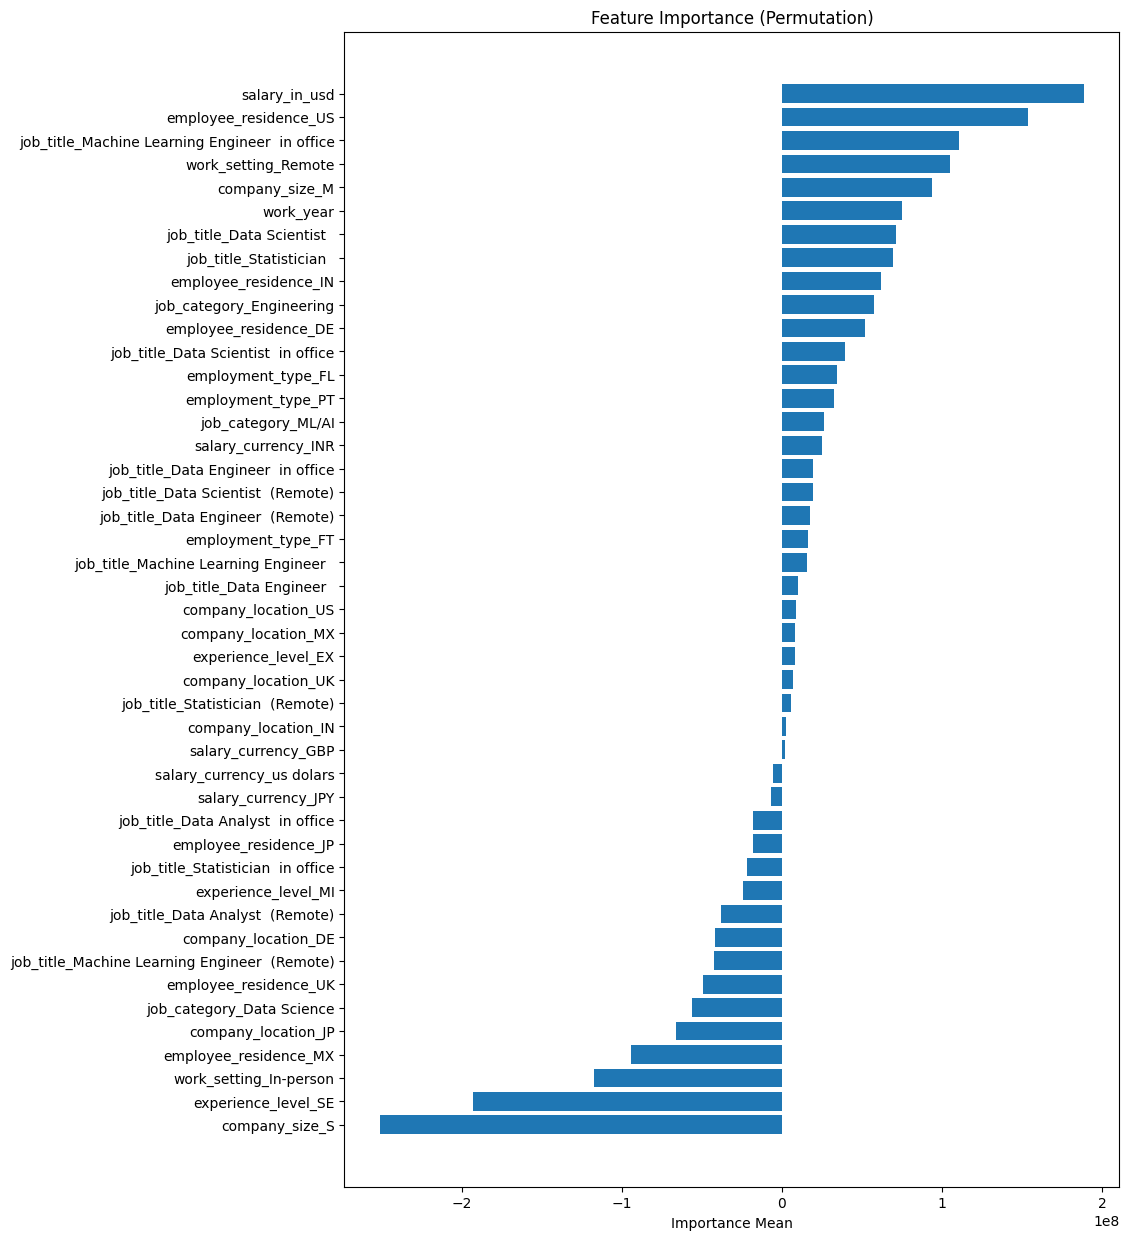

In [6]:
# Step 3: Predicting on the test set
y_pred = model.predict(X_test)
mse_before = mean_squared_error(y_test, y_pred)
print(f"Model MSE before permutation: {mse_before:.4f}")

# Step 4: Applying Permutation Importance
# This will shuffle the values of each feature and evaluate how it impacts the MSE
perm_importance = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

# Step 5: Displaying the feature importance results
feature_importance_df = pd.DataFrame({
    'Feature': indep_X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

# Sorting features by their importance
feature_importance_df = feature_importance_df.sort_values(by='Importance Mean', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)

# Step 6: Visualizing Feature Importance (Optional)
plt.figure(figsize=(10, 15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance Mean'])
plt.xlabel('Importance Mean')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()